## Loading the Libraries

In [1]:
# Importing the basic packages that we will be using 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
# Reading the diabetes data.
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
print('The shape of the data is:',df.shape)

The shape of the data is: (2000, 9)


In [4]:
# Lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
# Infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
# Checking for null values 
df.isnull().values.sum()

0

## Histogram

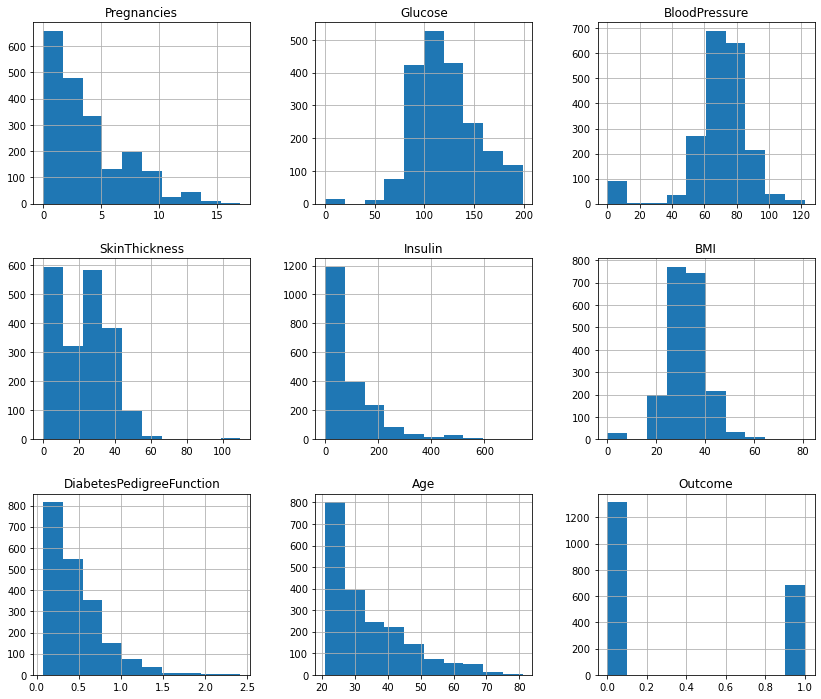

In [7]:
# Plotting Histogram
df.hist(bins=10,figsize=(14,12))
plt.show()

## Checking correlation

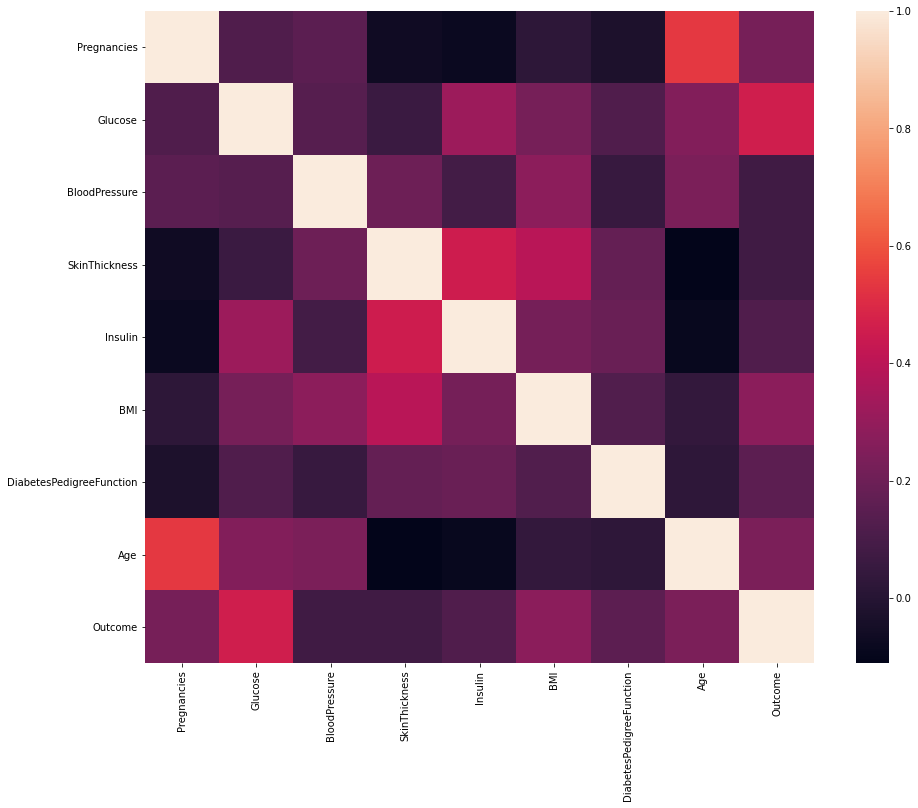

In [8]:
# Using Heatmap to check the corelation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())
plt.show()

#### We can see that, 
- Skin thickness, insulin, pregnancies and age are independent to each other.
- Age and pregnancies has negative correlation

[]

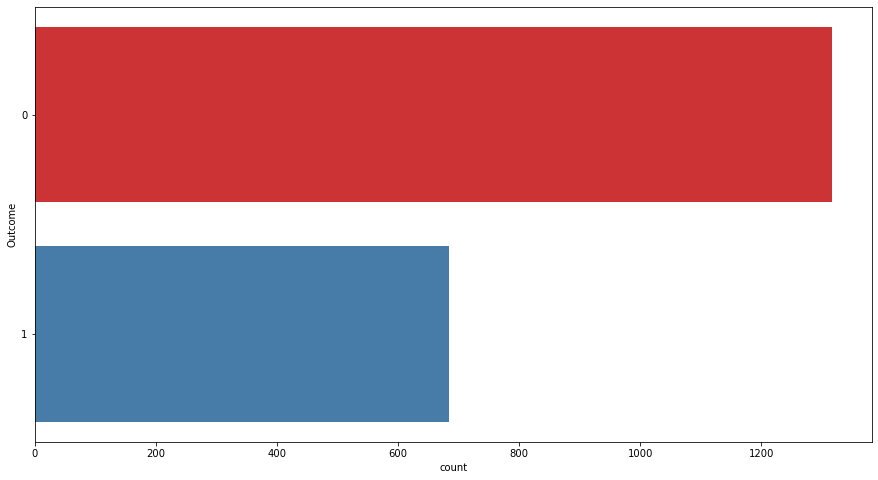

In [9]:
# 0 means no diabeted and 1 means patient with diabtes
plt.figure(figsize=(15,8))
sns.countplot(y=df['Outcome'],palette='Set1')
plt.plot()

> Here we can see that the number of Diabetic people are less in this dataset.

## Boxplot

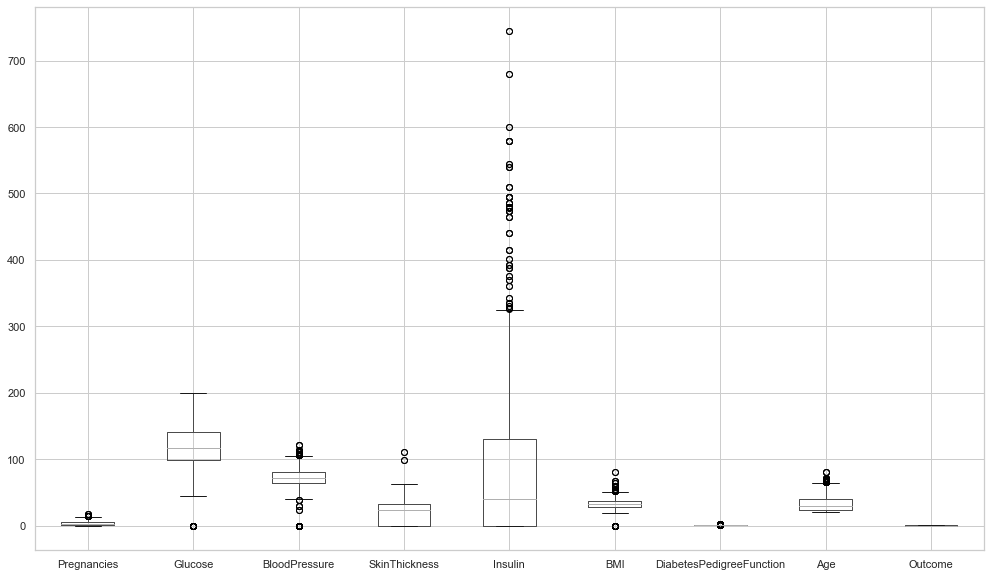

In [10]:
# Box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(17,10))
plt.show()

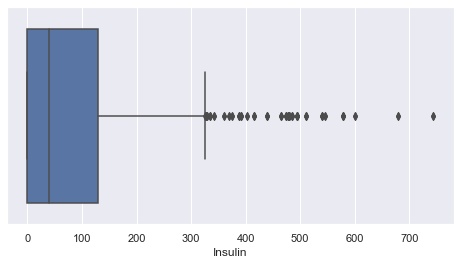

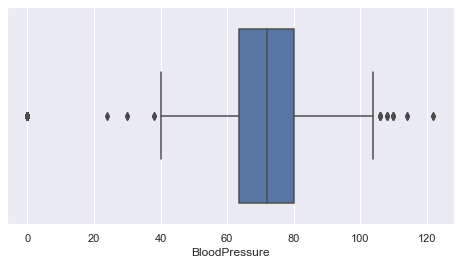

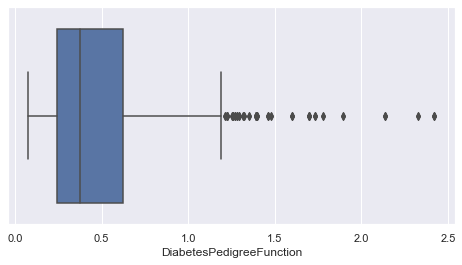

In [11]:
# Box plot to chek outliers in Insulin, BloodPressure and DiabetesPedigreeFunction.
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

> We can see that there are many outliers so we have to do outlier treatment them.

## IQR

In [12]:
# Setting the IQR Range remove
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

### Removing Outlier

In [13]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
# more than 300 records deleted

((2000, 9), (1652, 9))

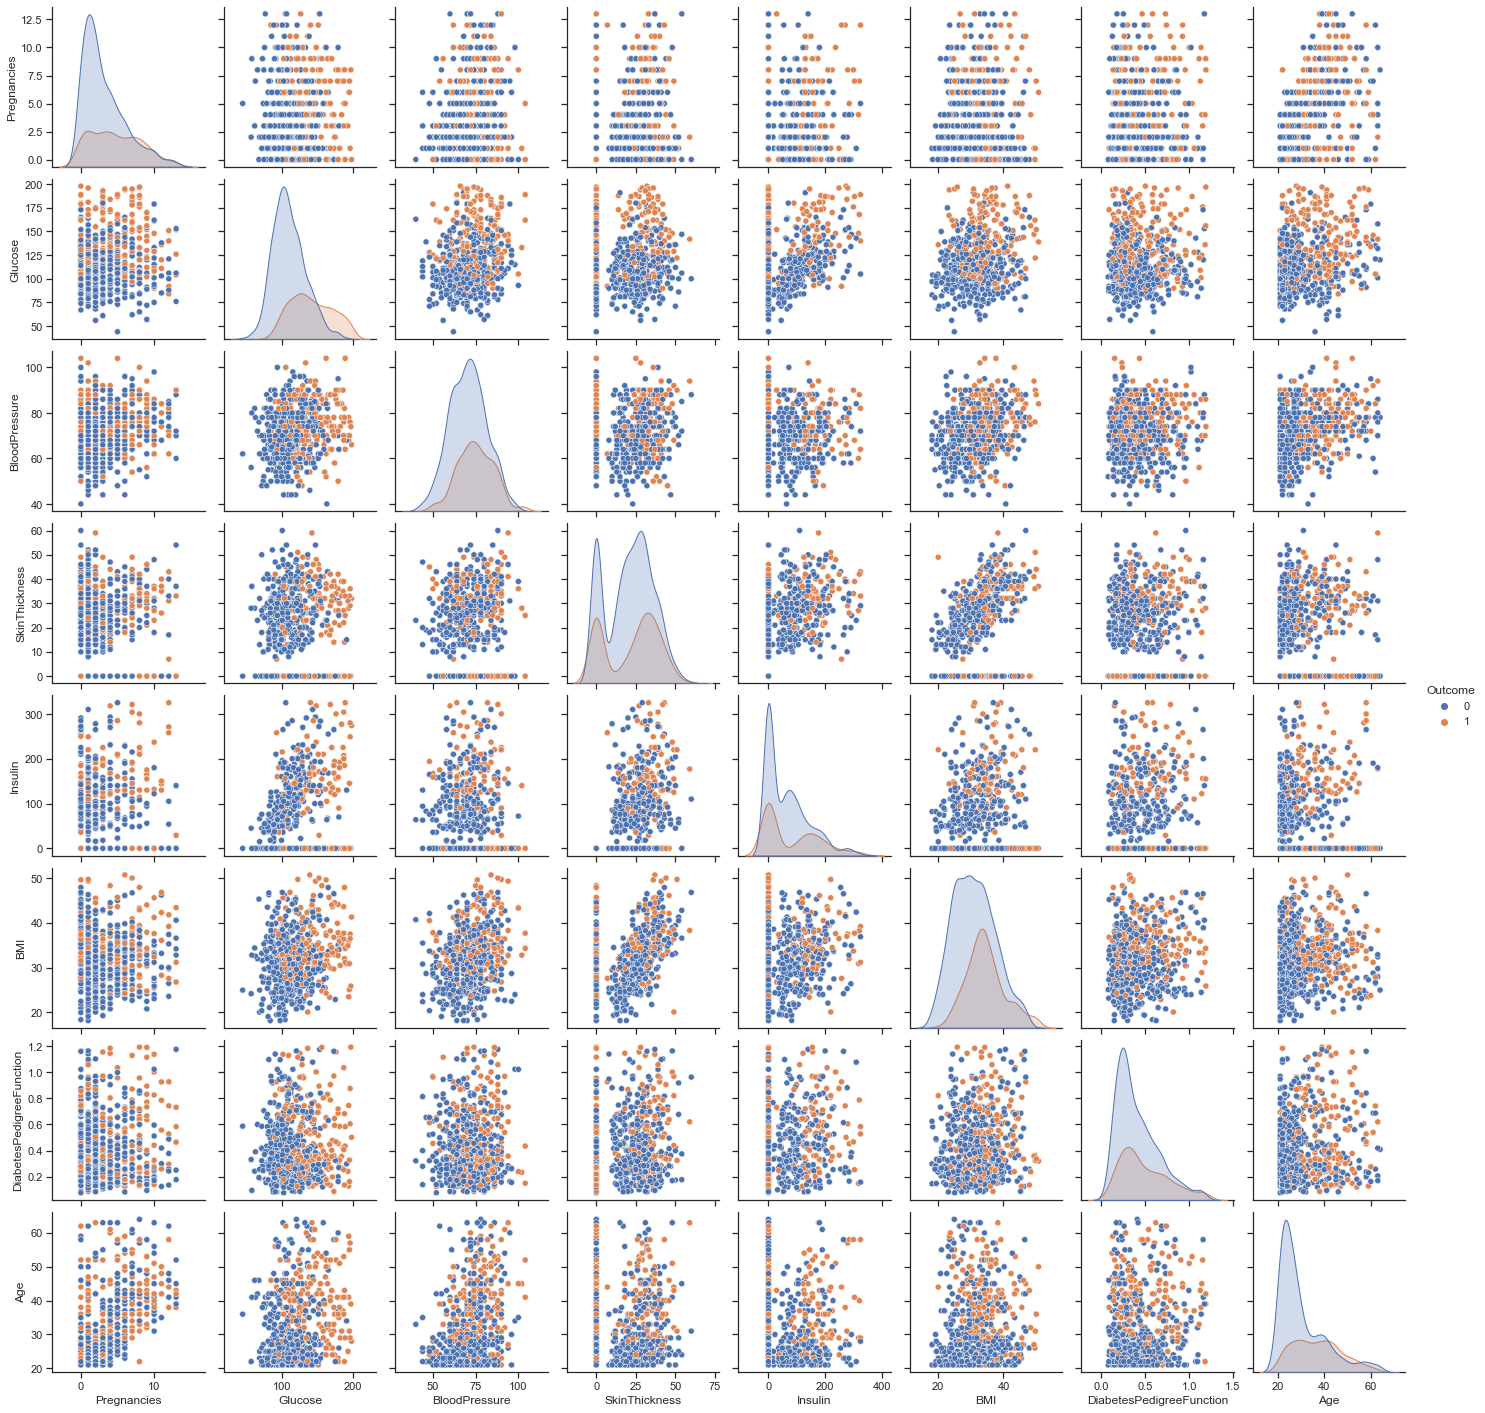

In [14]:
# Scatter matrix using pairplot after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

### Spliting the data

In [15]:
# Defining the X and y to split the data.
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [16]:
# Splitting train test data 70:30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
# Chcking the shape of all the train and test data
print('X_train:', X_train.shape,' X_test:', X_test.shape)
print('y_train:', y_train.shape,'   y_test:', y_test.shape)

X_train: (1156, 8)  X_test: (496, 8)
y_train: (1156,)    y_test: (496,)


In [18]:
# Creating DEF functions to find TN, FP, FN and FP
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

# Defining the TN, FP, FN and FP
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# Checking the cross validation 
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

# Using display_result function to print out TN, FP, FN and FP values.
def display_result(result):
    print("\nTP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

## Building models

## Logistic Regression

In [19]:
# Importing the Logistic Regression model from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

# Declaring Model
clf=LogisticRegression()
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)

Accuracy 0.780241935483871 ROC 0.7275567423230974

TP:  [14 17 16 13 18 19 15 21 16 16]
TN:  [70 72 74 74 76 78 77 75 75 75]
FN:  [20 17 18 21 16 16 19 13 18 18]
FP:  [12 10  8  8  6  3  4  6  6  6]


In [20]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 78.0241935483871


In [21]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,1
582,0,0
29,0,0
...,...,...
849,0,0
209,1,1
1373,1,1
1018,1,1


## Support Vector Machine

In [22]:
# Importing the SVC model from sklearn.svm
from sklearn.svm import SVC

# Declaring Model
clf=SVC(kernel='linear')
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.780241935483871 ROC 0.7288562527814865

TP:  [14 19 17 13 19 19 15 19 16 17]
TN:  [71 74 72 75 77 78 77 76 75 74]
FN:  [20 15 17 21 15 16 19 15 18 17]
FP:  [11  8 10  7  5  3  4  5  6  7]


In [23]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 78.0241935483871


In [24]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,1
582,0,1
29,0,0
...,...,...
849,0,0
209,1,1
1373,1,1
1018,1,1


## KNN

In [25]:
# Importing the KNeighborsClassifier model from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Declaring Model
clf=KNeighborsClassifier(n_neighbors=3)
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.844758064516129 ROC 0.8293813974187806

TP:  [21 21 19 23 23 25 26 23 24 20]
TN:  [74 74 71 72 74 74 73 76 73 71]
FN:  [13 13 15 11 11 10  8 11 10 14]
FP:  [ 8  8 11 10  8  7  8  5  8 10]


In [26]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 84.4758064516129


In [27]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,1
582,0,0
29,0,0
...,...,...
849,0,0
209,1,1
1373,1,0
1018,1,1


## Random forest

In [28]:
# Importing the RandomForestClassifier model from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Declaring Model
clf=RandomForestClassifier()
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.9778225806451613 ROC 0.9711704494882065

TP:  [32 32 27 31 30 32 31 33 33 32]
TN:  [79 82 80 79 79 79 77 80 80 79]
FN:  [2 2 7 3 4 3 3 1 1 2]
FP:  [3 0 2 3 3 2 4 1 1 2]


In [29]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 97.78225806451613


In [30]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,0
582,0,0
29,0,0
...,...,...
849,0,0
209,1,1
1373,1,1
1018,1,1


## Naive Bayes Theorem

In [31]:
# Importing the GaussianNB model from sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# Declaring Model
clf=GaussianNB()
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.7661290322580645 ROC 0.7309479305740988

TP:  [18 25 16 18 22 22 18 23 20 17]
TN:  [65 71 65 67 71 71 67 70 72 68]
FN:  [16  9 18 16 12 13 16 11 14 17]
FP:  [17 11 17 15 11 10 14 11  9 13]


In [32]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 76.61290322580645


In [33]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,1
582,0,1
29,0,0
...,...,...
849,0,1
209,1,1
1373,1,1
1018,1,1


## DecisionTree

In [34]:
# Importing the DecisionTreeClassifier model from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Declaring Model
clf=DecisionTreeClassifier()
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.9657258064516129 ROC 0.9540275923453493

TP:  [32 30 28 31 28 33 31 30 32 32]
TN:  [74 79 76 78 78 78 77 78 79 77]
FN:  [2 4 6 3 6 2 3 4 2 2]
FP:  [8 3 6 4 4 3 4 3 2 4]


In [35]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 96.57258064516128


In [36]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,0
582,0,0
29,0,0
...,...,...
849,0,0
209,1,1
1373,1,1
1018,1,1


## Gradient Boosting Classifier

In [37]:
# Importing the GradientBoostingClassifier model from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Declaring Model
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
# Fitting Model
clf.fit(X_train,y_train)
# Predicting the using the model
y_pred=clf.predict(X_test)

# Checking the Accuracy of the model
ac=accuracy_score(y_test,y_pred)
acc.append(ac)

# Finding the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Cross val score
result=cross_validate(clf,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.8830645161290323 ROC 0.8550778816199377

TP:  [23 22 25 27 28 21 24 26 29 25]
TN:  [77 79 74 78 77 73 74 79 79 76]
FN:  [11 12  9  7  6 14 10  8  5  9]
FP:  [5 3 8 4 5 8 7 2 2 5]


In [38]:
# Printing the Accuracy of the model 
print('Accuracy of the model is:',ac*100)

Accuracy of the model is: 88.30645161290323


In [39]:
# Display predicted values with the Actual values
pred_df= pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
pred_df

,Actual,Predicted
365,0,0
80,0,0
670,0,1
582,0,0
29,0,0
...,...,...
849,0,0
209,1,1
1373,1,1
1018,1,1


#### Lets plot a bar graph to compare all the models accuracy 


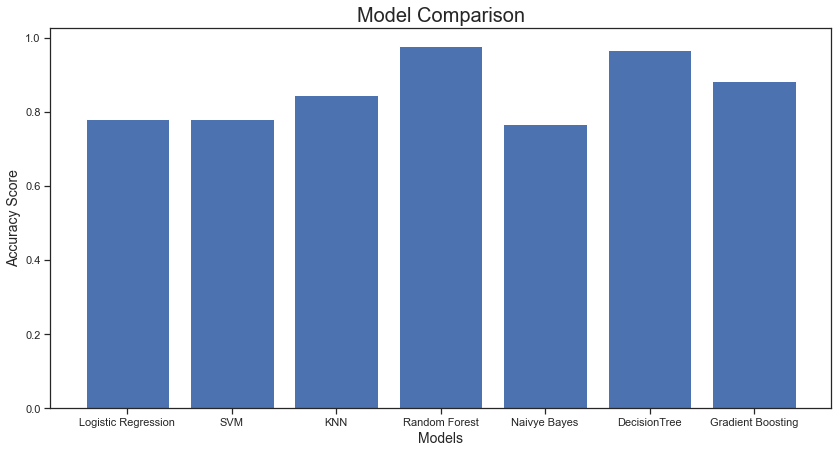

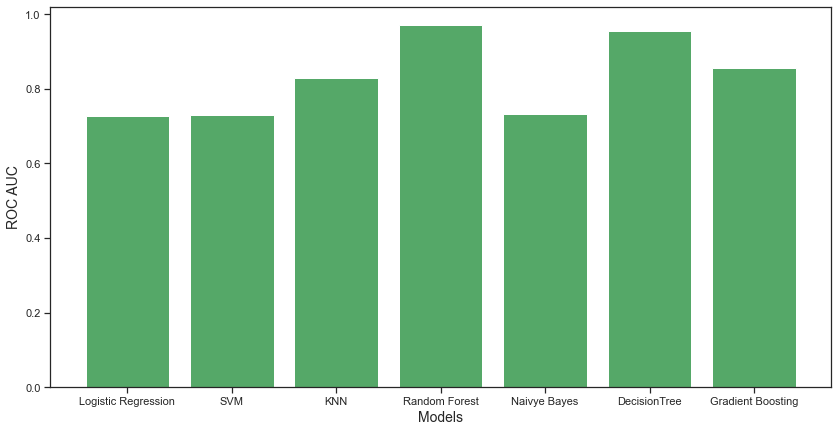

In [40]:
# Lets plot a bar graph to compare all the models accuracy 

ax=plt.figure(figsize=(14,7))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','DecisionTree','Gradient Boosting'],acc,label='Accuracy')
plt.title('Model Comparison', fontsize=20)
plt.ylabel('Accuracy Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.show()

ax=plt.figure(figsize=(14,7))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','DecisionTree','Gradient Boosting'],roc,color='g',label='ROC AUC')
plt.ylabel('ROC AUC', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.show()

#### The main objective of this model was to check and predict if a per son is Diabetic or not given the data.
- Using some of the supervised ML models we can see that Random forest has highest accuracy 98% and ROC_AUC curve 97%, 
- The model can be improve more if we take same count of labels in our model 30% is diabetic and 70% no diabetic patient
- The created models can be improvde with more fine tunning.

## ---------------------------------------------------------- END -------------------------------------------------------